In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
#Training data

In [ ]:
# Load training data
training_data = pd.read_csv('/content/train_FD001.txt',delimiter=" ")
training_data

,1,1.1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.00,39.06,23.4190,Unnamed: 26,Unnamed: 27
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20626,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20627,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20628,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [ ]:
#Dropping last three rows
training_data.drop(["Unnamed: 26","Unnamed: 27","23.4190"],axis= 1 ,inplace=True)

In [ ]:
training_data

,1,1.1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.00,39.06
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,47.16,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49
20626,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30
20627,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44
20628,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29


In [ ]:
import pandas as pd

# Assuming 'training_data' is your DataFrame
columns = training_data.columns
print(columns)
column_list = columns.tolist()
print(column_list)


Index(['1', '1.1', '-0.0007', '-0.0004', '100.0', '518.67', '641.82',
       '1589.70', '1400.60', '14.62', '21.61', '554.36', '2388.06', '9046.19',
       '1.30', '47.47', '521.66', '2388.02', '8138.62', '8.4195', '0.03',
       '392', '2388', '100.00', '39.06'],
      dtype='object')
['1', '1.1', '-0.0007', '-0.0004', '100.0', '518.67', '641.82', '1589.70', '1400.60', '14.62', '21.61', '554.36', '2388.06', '9046.19', '1.30', '47.47', '521.66', '2388.02', '8138.62', '8.4195', '0.03', '392', '2388', '100.00', '39.06']


In [ ]:
import pandas as pd

# Assuming 'training_data' is your DataFrame
column_mapping = {
    '1': 'unit_number',
    '1.1': 'time_in_cycles',
    '-0.0007': 'operational_setting_1',
    '-0.0004': 'operational_setting_2',
    '100.0': 'operational_setting_3',
    '518.67': 'sensor_measurement_1',
    '641.82': 'sensor_measurement_2',
    '1589.70': 'sensor_measurement_3',
    '1400.60': 'sensor_measurement_4',
    '14.62': 'sensor_measurement_5',
    '21.61': 'sensor_measurement_6',
    '554.36': 'sensor_measurement_7',
    '2388.06': 'sensor_measurement_8',
    '9046.19': 'sensor_measurement_9',
    '1.30': 'sensor_measurement_10',
    '47.47': 'sensor_measurement_11',
    '521.66': 'sensor_measurement_12',
    '2388.02': 'sensor_measurement_13',
    '8138.62': 'sensor_measurement_14',
    '8.4195': 'sensor_measurement_15',
    '0.03': 'sensor_measurement_16',
    '392': 'sensor_measurement_17',
    '2388': 'sensor_measurement_18',
    '100.00': 'sensor_measurement_19',
    '39.06': 'sensor_measurement_20',
}

training_data.rename(columns=column_mapping, inplace=True)


In [ ]:
training_data

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,47.16,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49
20626,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30
20627,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44
20628,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29


In [ ]:
print(training_data.dtypes)

unit_number                int64
time_in_cycles             int64
operational_setting_1    float64
operational_setting_2    float64
operational_setting_3    float64
sensor_measurement_1     float64
sensor_measurement_2     float64
sensor_measurement_3     float64
sensor_measurement_4     float64
sensor_measurement_5     float64
sensor_measurement_6     float64
sensor_measurement_7     float64
sensor_measurement_8     float64
sensor_measurement_9     float64
sensor_measurement_10    float64
sensor_measurement_11    float64
sensor_measurement_12    float64
sensor_measurement_13    float64
sensor_measurement_14    float64
sensor_measurement_15    float64
sensor_measurement_16    float64
sensor_measurement_17      int64
sensor_measurement_18      int64
sensor_measurement_19    float64
sensor_measurement_20    float64
dtype: object


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [ ]:
#PREPROCESSING TECHNIQUES

In [ ]:
#1. Handling Missing Values
#checking for the null values
print(training_data.isnull().sum())

unit_number              0
time_in_cycles           0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
dtype: int64


In [ ]:
#2.Feature Scaling:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Select numeric columns to be scaled
numeric_columns = training_data.columns.difference(['unit_number', 'time_in_cycles'])

# Standardization (Z-score normalization)
standard_scaler = StandardScaler()
training_data [numeric_columns] = standard_scaler.fit_transform(training_data [numeric_columns])

# Display the scaled DataFrame
print(training_data.head())


   unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               2               0.872688              -1.031809   
1            1               3              -1.961847               1.015632   
2            1               4               0.324068              -0.008089   
3            1               5              -0.864608              -0.690569   
4            1               6              -1.961847              -0.349329   

   operational_setting_3  sensor_measurement_1  sensor_measurement_2  \
0                    0.0                   0.0             -1.061914   
1                    0.0                   0.0             -0.661928   
2                    0.0                   0.0             -0.661928   
3                    0.0                   0.0             -0.621929   
4                    0.0                   0.0             -1.161910   

   sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  ...  \
0         

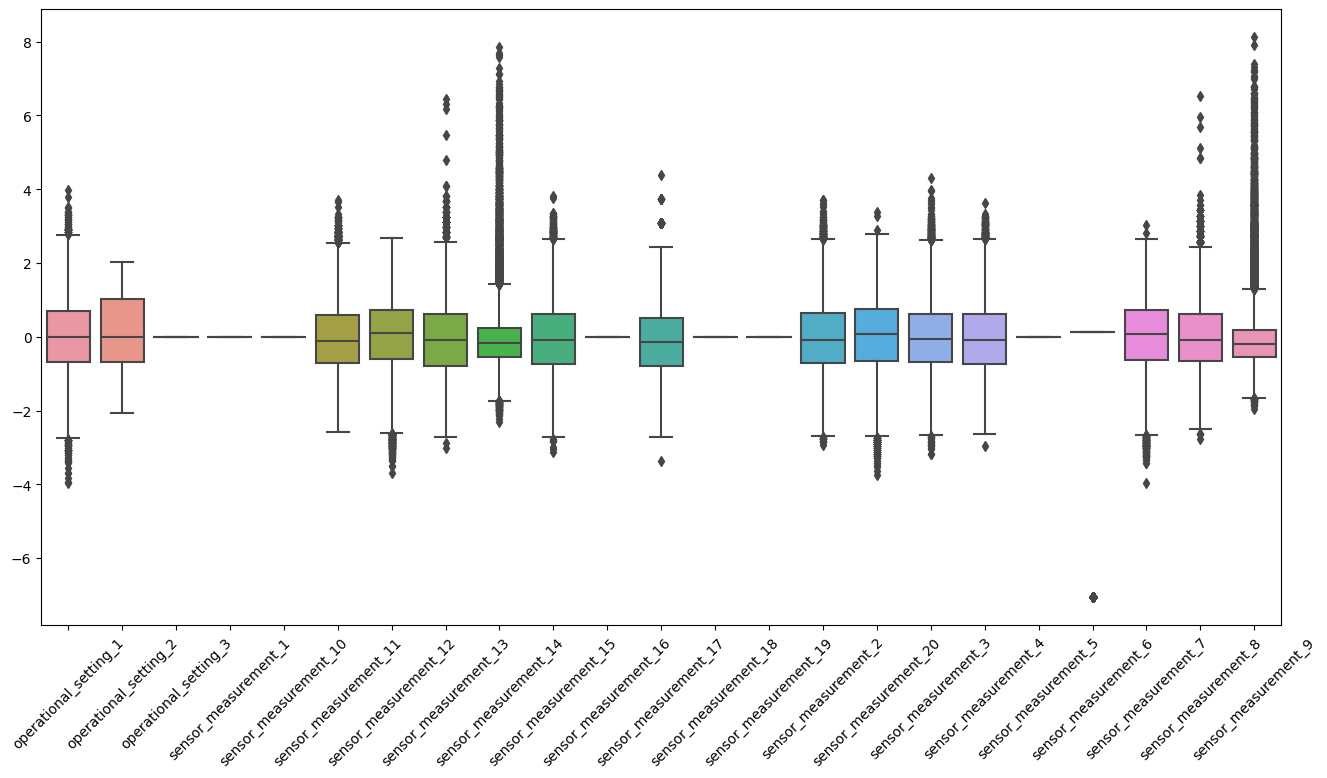

In [ ]:
#3.Detection of outliers
import matplotlib.pyplot as plt
import seaborn as sns
# Select columns to plot (excluding non-numeric columns like 'unit_number' and 'time_in_cycles')
numeric_columns = training_data.columns.difference(['unit_number', 'time_in_cycles'])
# Create box plots for each numeric column
plt.figure(figsize=(16, 8))
sns.boxplot(data=training_data [numeric_columns])
plt.xticks(rotation=45)
plt.show()


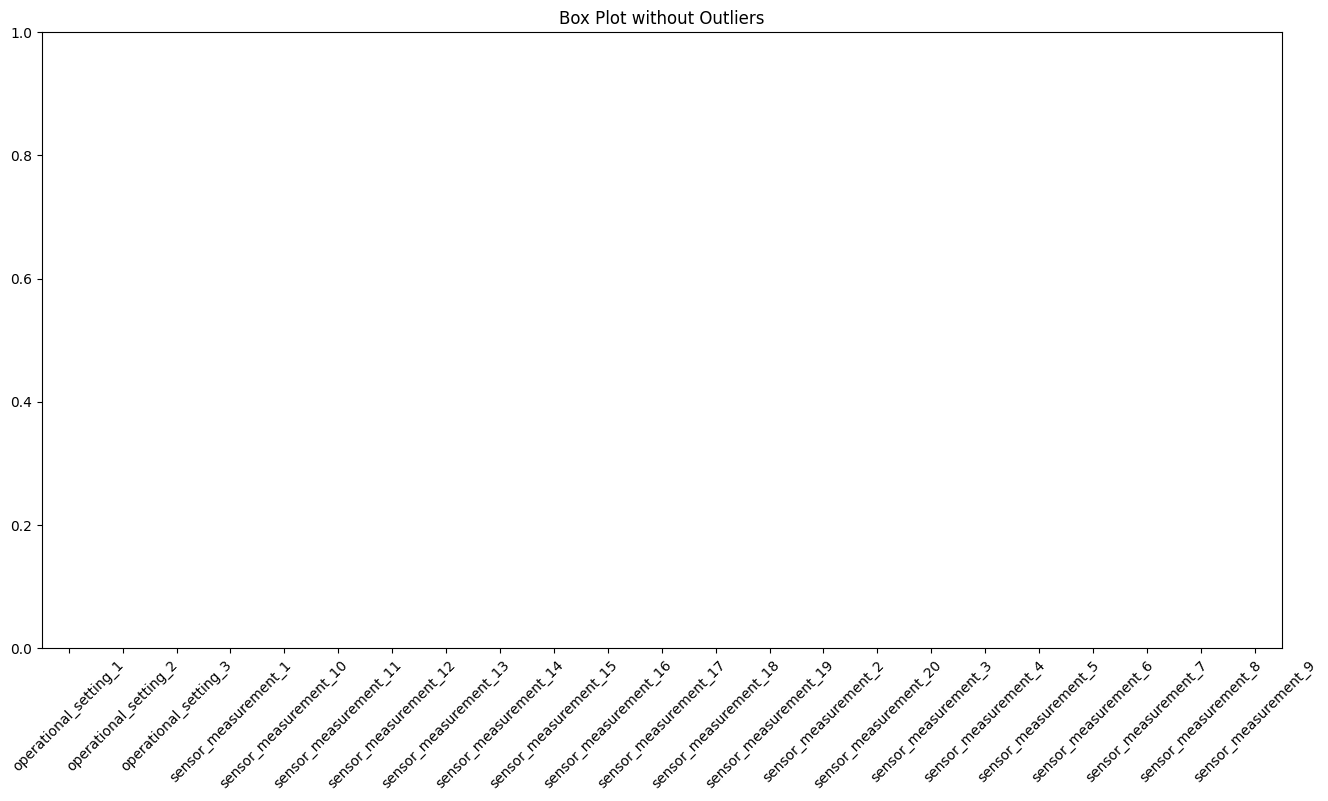

In [ ]:
#4.Removing outliers
from scipy.stats import zscore
from scipy.stats import iqr

z_scores = zscore(training_data[numeric_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
training_data_no_outliers = training_data[filtered_entries]

import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for each numeric column after removing outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=training_data_no_outliers[numeric_columns])
plt.xticks(rotation=45)
plt.title('Box Plot without Outliers')
plt.show()



In [ ]:
#DATA ANALYSIS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 1.Descriptive Statistics
descriptive_stats = training_data.describe()
print(descriptive_stats)


        unit_number  time_in_cycles  operational_setting_1  \
count  20630.000000    20630.000000           2.063000e+04   
mean      51.509016      108.813088          -1.790995e-17   
std       29.226226       68.878570           1.000024e+00   
min        1.000000        1.000000          -3.973452e+00   
25%       26.000000       52.000000          -6.817345e-01   
50%       52.000000      104.000000           4.039964e-03   
75%       77.000000      156.000000           6.898144e-01   
max      100.000000      362.000000           3.981532e+00   

       operational_setting_2  operational_setting_3  sensor_measurement_1  \
count           2.063000e+04                20630.0               20630.0   
mean           -3.099799e-18                    0.0                   0.0   
std             1.000024e+00                    0.0                   0.0   
min            -2.055530e+00                    0.0                   0.0   
25%            -6.905689e-01                    0.0     

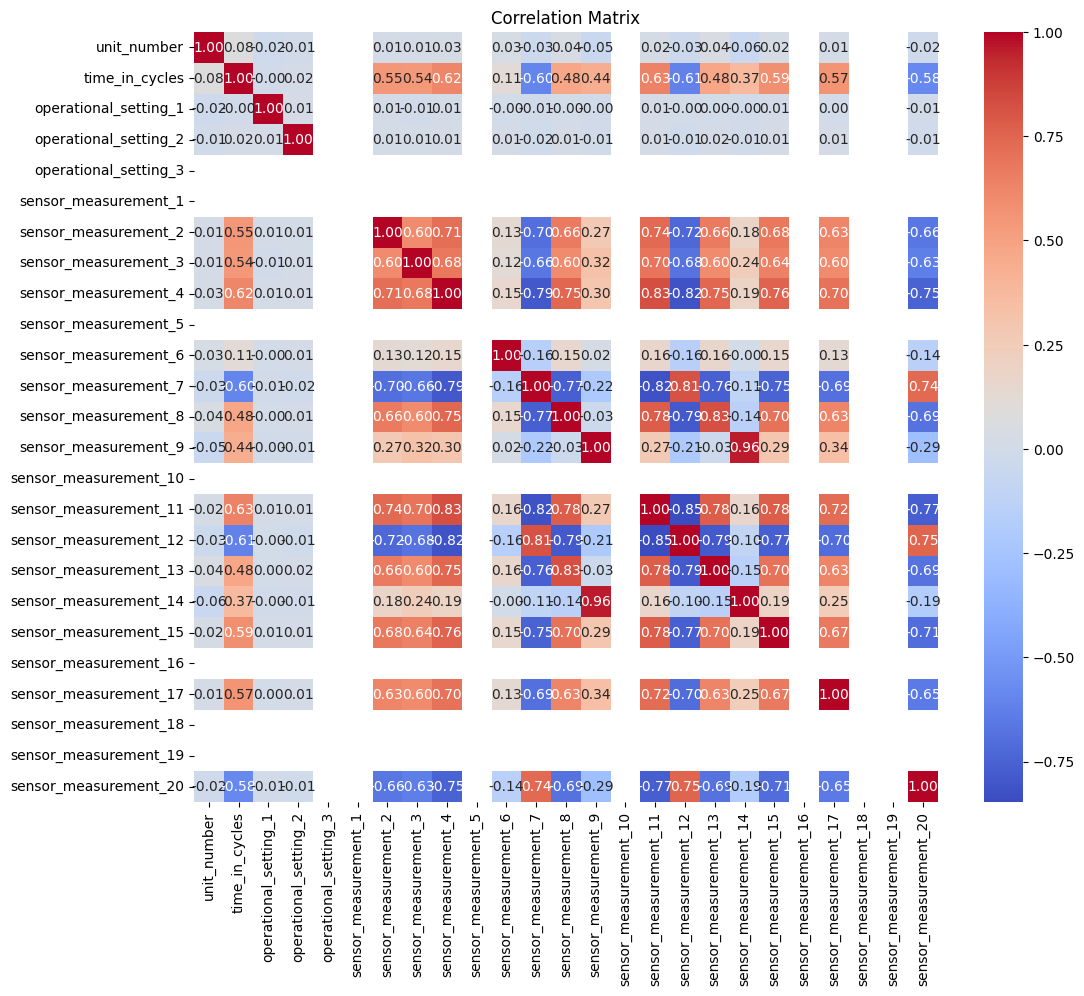

In [ ]:
# 2.Correlation Analysis
correlation_matrix = training_data.corr()
# Plot the heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



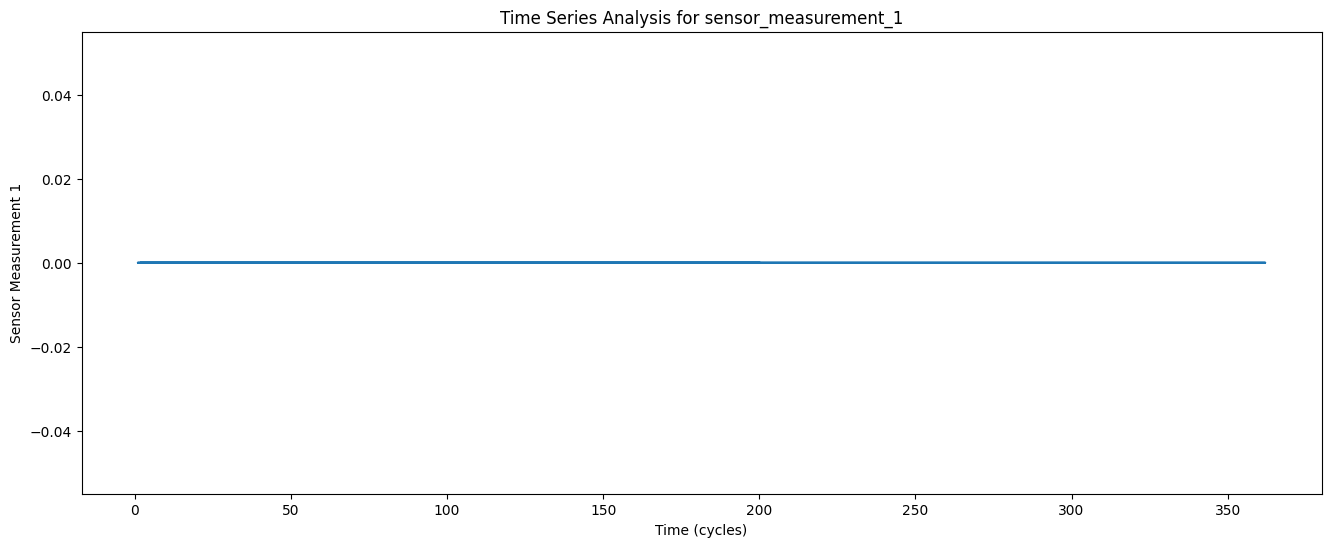

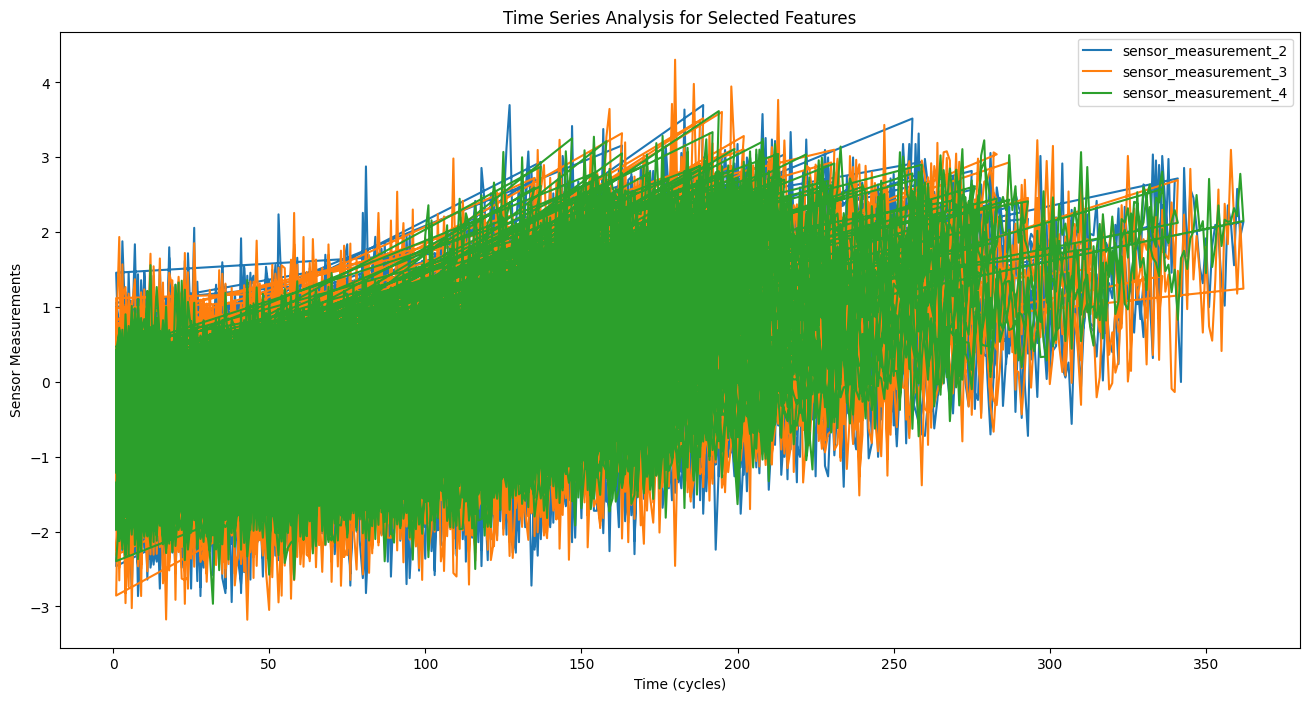

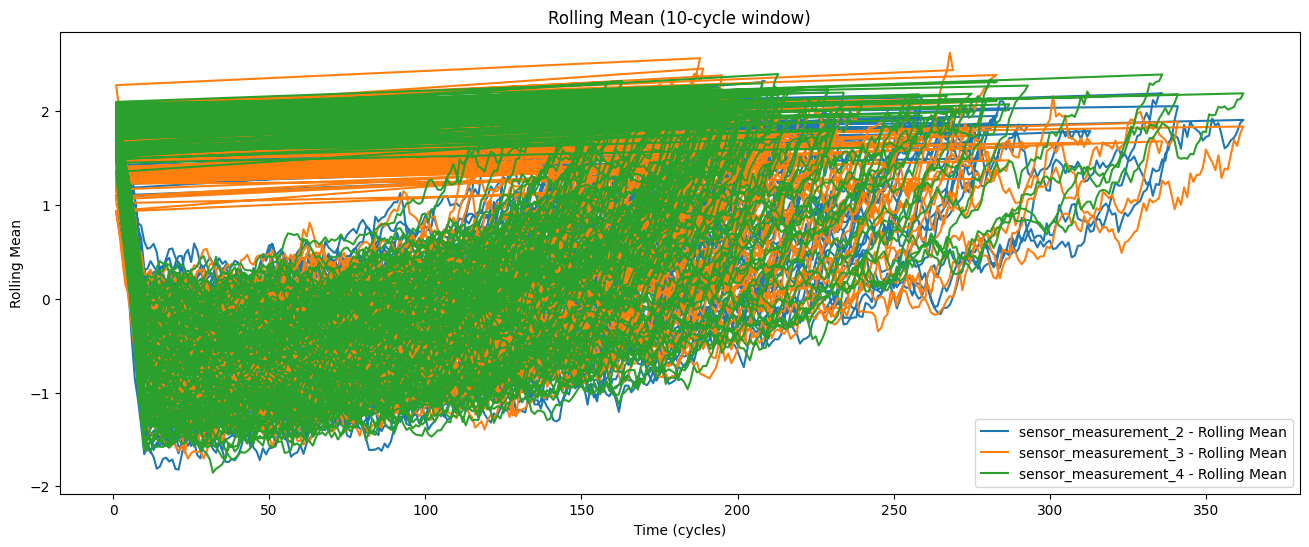

In [ ]:
#3.Time series analysis
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in the 'training_data' DataFrame
time_series_data = training_data.set_index('time_in_cycles')

# Plot time series for a specific feature (e.g., 'sensor_measurement_1')
plt.figure(figsize=(16, 6))
plt.plot(time_series_data['sensor_measurement_1'])
plt.title('Time Series Analysis for sensor_measurement_1')
plt.xlabel('Time (cycles)')
plt.ylabel('Sensor Measurement 1')
plt.show()

# Alternatively, you can plot time series for multiple features
selected_features = ['sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4']

plt.figure(figsize=(16, 8))
for feature in selected_features:
    plt.plot(time_series_data[feature], label=feature)

plt.title('Time Series Analysis for Selected Features')
plt.xlabel('Time (cycles)')
plt.ylabel('Sensor Measurements')
plt.legend()
plt.show()

# Explore trends and patterns in the time series
# You can use additional time series analysis techniques such as rolling statistics, decomposition, etc.
# For example, plotting rolling mean and standard deviation
window_size = 10

plt.figure(figsize=(16, 6))
for feature in selected_features:
    rolling_mean = time_series_data[feature].rolling(window=window_size).mean()
    plt.plot(rolling_mean, label=f'{feature} - Rolling Mean')

plt.title(f'Rolling Mean ({window_size}-cycle window)')
plt.xlabel('Time (cycles)')
plt.ylabel('Rolling Mean')
plt.legend()
plt.show()

# Repeat similar steps for rolling standard deviation if needed


In [ ]:
correlations = training_data.corr(method='pearson')
correlations


,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20
unit_number,1.000000,0.078632,-0.017923,-0.006312,NaN,NaN,0.013991,0.012611,0.026041,NaN,...,0.024687,-0.031857,0.044146,-0.059500,0.022438,NaN,0.013449,NaN,NaN,-0.020478
time_in_cycles,0.078632,1.000000,-0.004551,0.016030,NaN,NaN,0.549840,0.543969,0.624557,NaN,...,0.634403,-0.611366,0.477484,0.370326,0.588670,NaN,0.566978,NaN,NaN,-0.583555
operational_setting_1,-0.017923,-0.004551,1.000000,0.011640,NaN,NaN,0.009004,-0.005653,0.009530,NaN,...,0.011654,-0.001486,0.002302,-0.004474,0.007643,NaN,0.002587,NaN,NaN,-0.005692
operational_setting_2,-0.006312,0.016030,0.011640,1.000000,NaN,NaN,0.007152,0.009059,0.014612,NaN,...,0.011673,-0.010901,0.018087,-0.006329,0.014117,NaN,0.012229,NaN,NaN,-0.010465
operational_setting_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_measurement_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_measurement_2,0.013991,0.549840,0.009004,0.007152,NaN,NaN,1.000000,0.602642,0.714938,NaN,...,0.740052,-0.724605,0.661770,0.179743,0.675979,NaN,0.629875,NaN,NaN,-0.661805
sensor_measurement_3,0.012611,0.543969,-0.005653,0.009059,NaN,NaN,0.602642,1.000000,0.678421,NaN,...,0.695900,-0.680307,0.600973,0.237136,0.639923,NaN,0.600021,NaN,NaN,-0.625961
sensor_measurement_4,0.026041,0.624557,0.009530,0.014612,NaN,NaN,0.714938,0.678421,1.000000,NaN,...,0.830142,-0.815595,0.745147,0.190740,0.758454,NaN,0.703489,NaN,NaN,-0.748055
sensor_measurement_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
training_data = training_data.drop(columns=["operational_setting_3","sensor_measurement_1","sensor_measurement_5","sensor_measurement_10","sensor_measurement_16",
                                            "sensor_measurement_19","sensor_measurement_18"])
training_data


,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20
0,1,2,0.872688,-1.031809,-1.061914,0.211517,-0.643769,0.141687,0.431987,-0.798104,-0.958853,-0.191592,1.174890,-0.363698,-0.642843,-0.275877,-0.781740,1.016613
1,1,3,-1.961847,1.015632,-0.661928,-0.413162,-0.525996,0.141687,1.008216,-0.234605,-0.557178,-1.015293,1.364708,-0.919895,-0.551630,-0.649163,-2.073113,0.739971
2,1,4,0.324068,-0.008089,-0.661928,-1.261291,-0.784873,0.141687,1.222889,0.188020,-0.713863,-1.539467,1.961276,-0.224649,-0.520177,-1.971664,-0.781740,0.352671
3,1,5,-0.864608,-0.690569,-0.621929,-1.251505,-0.301562,0.141687,0.714452,-0.516354,-0.457098,-0.977852,1.052865,-0.780846,-0.521750,-0.339869,-0.136054,0.463328
4,1,6,-1.961847,-0.349329,-1.161910,-0.987280,-1.173744,0.141687,1.471459,-1.079853,-0.704806,-1.427144,0.361388,-0.919895,-0.571550,-0.835807,-1.427426,0.905956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,100,196,-0.178833,-1.031809,1.617993,1.216223,2.188322,0.141687,-2.189288,1.315018,0.012505,1.979986,-2.607897,2.278237,-0.322548,1.425243,2.446690,-1.805143
20626,100,197,-0.727453,-1.714289,1.717990,2.279646,2.738297,0.141687,-2.833309,1.878517,-0.006062,1.867663,-2.350288,1.722040,-0.380212,1.913182,1.155318,-2.856386
20627,100,198,0.186913,-0.008089,1.477998,1.946918,2.138325,0.141687,-2.742920,2.019392,0.029713,2.054868,-1.902861,2.000139,-0.141694,3.265012,3.092376,-2.081786
20628,100,199,-0.498861,1.015632,1.098011,2.403603,1.955000,0.141687,-3.036683,2.160267,0.383840,3.178098,-2.363846,1.861090,-0.233956,2.579765,1.155318,-2.911715


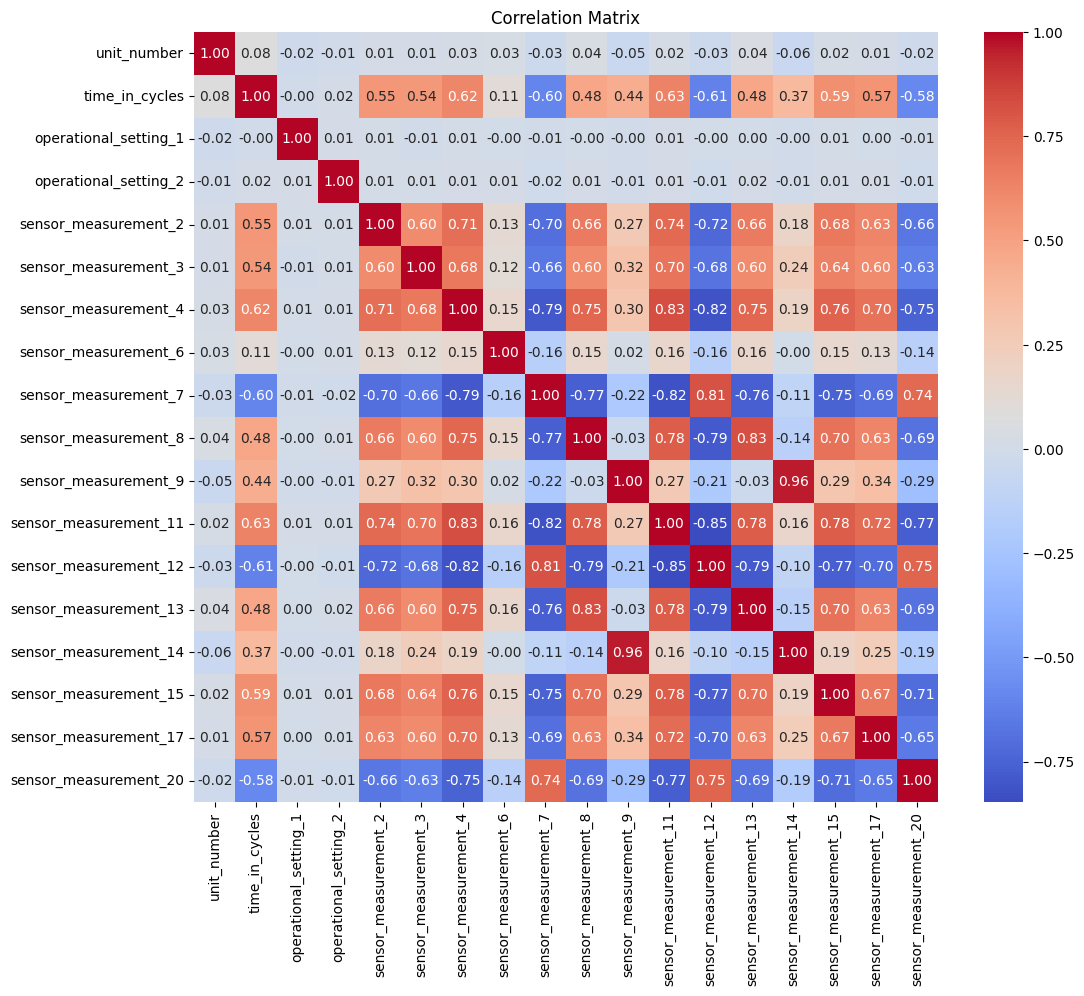

In [ ]:
# 2.Correlation Analysis
correlation_matrix = training_data.corr()
# Plot the heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#Testing data

In [ ]:
# Load training data
testing_data = pd.read_csv('/content/test_FD001.txt',delimiter=" ")
testing_data

,1,1.1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.00,38.86,23.3735,Unnamed: 26,Unnamed: 27
0,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
1,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
2,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
3,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
4,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13090,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13091,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13092,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13093,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN


In [ ]:
#Dropping last three rows
testing_data.drop(["Unnamed: 26","Unnamed: 27","23.3735"],axis= 1 ,inplace=True)

In [ ]:
testing_data

,1,1.1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.00,38.86
0,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02
1,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08
2,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00
3,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99
4,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,47.26,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13090,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65
13091,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57
13092,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62
13093,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66


In [ ]:
import pandas as pd

# Assuming 'training_data' is your DataFrame
columns = testing_data.columns
print(columns)
column_list = columns.tolist()
print(column_list)

Index(['1', '1.1', '0.0023', '0.0003', '100.0', '518.67', '643.02', '1585.29',
       '1398.21', '14.62', '21.61', '553.90', '2388.04', '9050.17', '1.30',
       '47.20', '521.72', '2388.03', '8125.55', '8.4052', '0.03', '392',
       '2388', '100.00', '38.86'],
      dtype='object')
['1', '1.1', '0.0023', '0.0003', '100.0', '518.67', '643.02', '1585.29', '1398.21', '14.62', '21.61', '553.90', '2388.04', '9050.17', '1.30', '47.20', '521.72', '2388.03', '8125.55', '8.4052', '0.03', '392', '2388', '100.00', '38.86']


In [ ]:
import pandas as pd

# Assuming 'testing_data' is your DataFrame
column_mapping = {
    '1': 'unit_number',
    '1.1': 'time_in_cycles',
    '0.0023': 'operational_setting_1',
    '0.0003': 'operational_setting_2',
    '100.0': 'operational_setting_3',
    '518.67': 'sensor_measurement_1',
    '643.02': 'sensor_measurement_2',
    '1585.29': 'sensor_measurement_3',
    '1398.21': 'sensor_measurement_4',
    '14.62': 'sensor_measurement_5',
    '21.61': 'sensor_measurement_6',
    '553.90': 'sensor_measurement_7',
    '2388.04': 'sensor_measurement_8',
    '9050.17': 'sensor_measurement_9',
    '1.30': 'sensor_measurement_10',
    '47.20': 'sensor_measurement_11',
    '521.72': 'sensor_measurement_12',
    '2388.03': 'sensor_measurement_13',
    '8125.55': 'sensor_measurement_14',
    '8.4052': 'sensor_measurement_15',
    '0.03': 'sensor_measurement_16',
    '392': 'sensor_measurement_17',
    '2388': 'sensor_measurement_18',
    '100.00': 'sensor_measurement_19',
    '38.86': 'sensor_measurement_20',
}

testing_data.rename(columns=column_mapping, inplace=True)

# Display the DataFrame after renaming columns
print(testing_data.head())


   unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               2                -0.0027                -0.0003   
1            1               3                 0.0003                 0.0001   
2            1               4                 0.0042                 0.0000   
3            1               5                 0.0014                 0.0000   
4            1               6                 0.0012                 0.0003   

   operational_setting_3  sensor_measurement_1  sensor_measurement_2  \
0                  100.0                518.67                641.71   
1                  100.0                518.67                642.46   
2                  100.0                518.67                642.44   
3                  100.0                518.67                642.51   
4                  100.0                518.67                642.11   

   sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  ...  \
0         

In [ ]:
testing_data

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20
0,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02
1,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08
2,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00
3,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99
4,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,47.26,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13090,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65
13091,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57
13092,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62
13093,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66


In [ ]:
testing_data.columns

Index(['unit_number', 'time_in_cycles', 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3',
       'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3',
       'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6',
       'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9',
       'sensor_measurement_10', 'sensor_measurement_11',
       'sensor_measurement_12', 'sensor_measurement_13',
       'sensor_measurement_14', 'sensor_measurement_15',
       'sensor_measurement_16', 'sensor_measurement_17',
       'sensor_measurement_18', 'sensor_measurement_19',
       'sensor_measurement_20'],
      dtype='object')

In [ ]:
print(testing_data.dtypes)

unit_number                int64
time_in_cycles             int64
operational_setting_1    float64
operational_setting_2    float64
operational_setting_3    float64
sensor_measurement_1     float64
sensor_measurement_2     float64
sensor_measurement_3     float64
sensor_measurement_4     float64
sensor_measurement_5     float64
sensor_measurement_6     float64
sensor_measurement_7     float64
sensor_measurement_8     float64
sensor_measurement_9     float64
sensor_measurement_10    float64
sensor_measurement_11    float64
sensor_measurement_12    float64
sensor_measurement_13    float64
sensor_measurement_14    float64
sensor_measurement_15    float64
sensor_measurement_16    float64
sensor_measurement_17      int64
sensor_measurement_18      int64
sensor_measurement_19    float64
sensor_measurement_20    float64
dtype: object


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#PREPROCESSING TECHNIQUES

In [ ]:
#1. Handling Missing Values
#checking for the null values
print(testing_data.isnull().sum())

unit_number              0
time_in_cycles           0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
dtype: int64


In [ ]:
#2.Feature Scaling:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Select numeric columns to be scaled
numeric_columns = training_data.columns.difference(['unit_number', 'time_in_cycles'])

# Standardization (Z-score normalization)
standard_scaler = StandardScaler()
training_data [numeric_columns] = standard_scaler.fit_transform(training_data [numeric_columns])

# Display the scaled DataFrame
print(training_data.head())

   unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               2               0.872688              -1.031809   
1            1               3              -1.961847               1.015632   
2            1               4               0.324068              -0.008089   
3            1               5              -0.864608              -0.690569   
4            1               6              -1.961847              -0.349329   

   sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  \
0             -1.061914              0.211517             -0.643769   
1             -0.661928             -0.413162             -0.525996   
2             -0.661928             -1.261291             -0.784873   
3             -0.621929             -1.251505             -0.301562   
4             -1.161910             -0.987280             -1.173744   

   sensor_measurement_6  sensor_measurement_7  sensor_measurement_8  \
0              0.1416

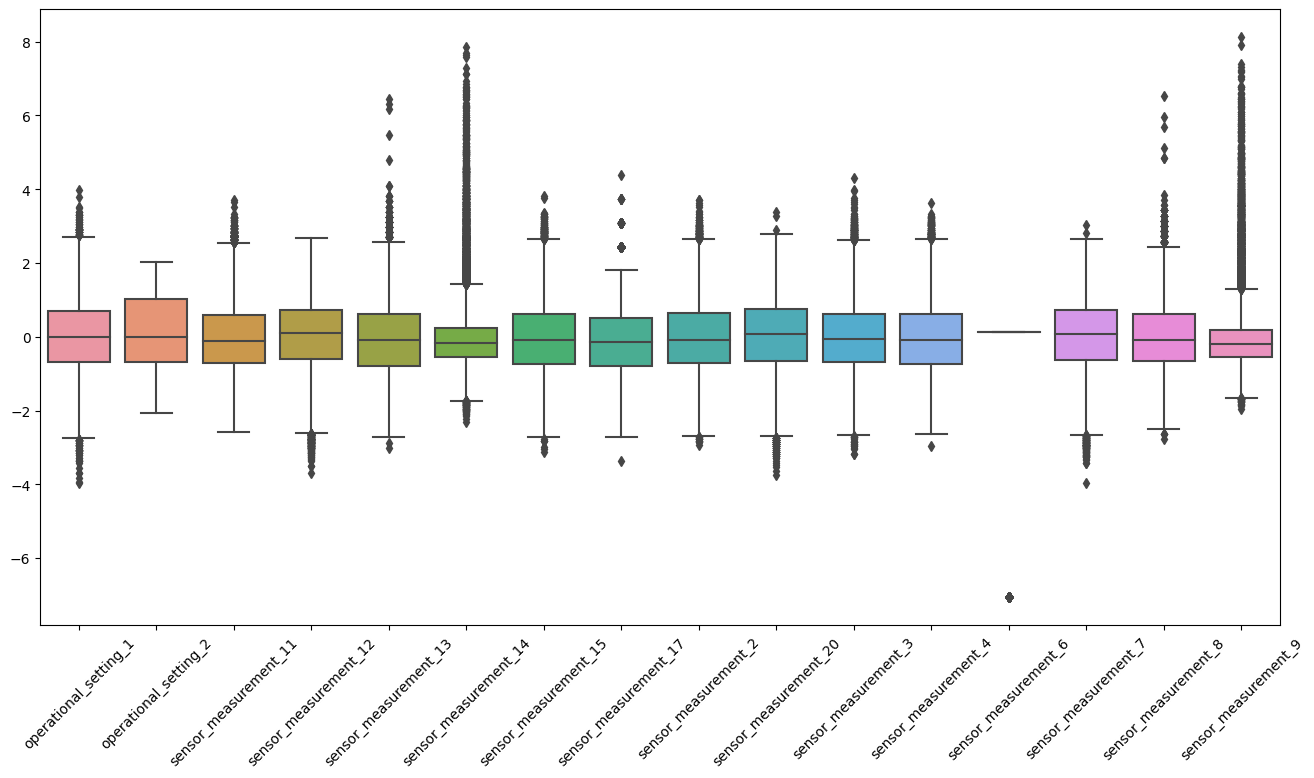

In [ ]:
#3.Detection of outliers
import matplotlib.pyplot as plt
import seaborn as sns
# Select columns to plot (excluding non-numeric columns like 'unit_number' and 'time_in_cycles')
numeric_columns = training_data.columns.difference(['unit_number', 'time_in_cycles'])
# Create box plots for each numeric column
plt.figure(figsize=(16, 8))
sns.boxplot(data=training_data [numeric_columns])
plt.xticks(rotation=45)
plt.show()

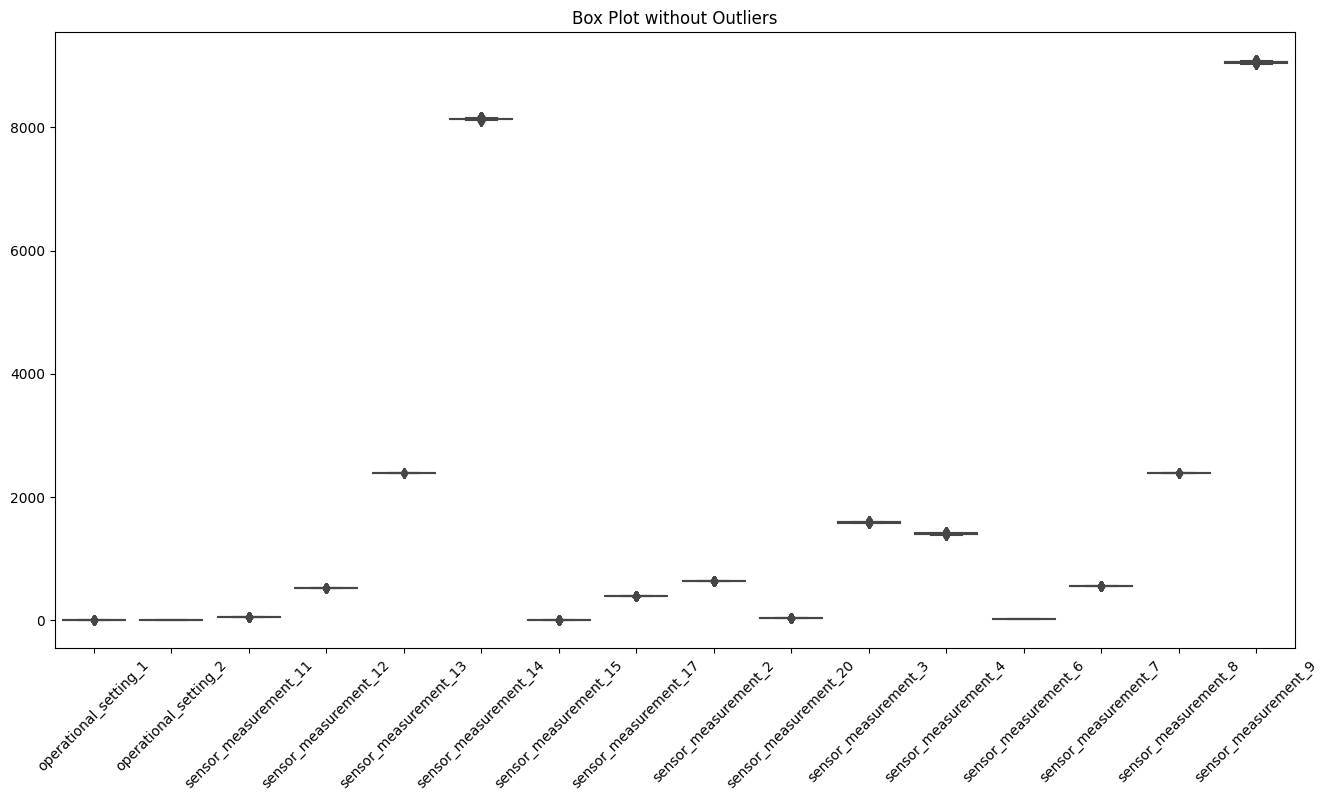

In [ ]:
#4.Removing outliers
from scipy.stats import zscore
from scipy.stats import iqr

z_scores = zscore(testing_data[numeric_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
testing_data_no_outliers = testing_data[filtered_entries]

import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for each numeric column after removing outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=testing_data_no_outliers[numeric_columns])
plt.xticks(rotation=45)
plt.title('Box Plot without Outliers')
plt.show()

In [ ]:
#DATA ANALYSIS

In [ ]:
# 1.Descriptive Statistics
descriptive_stats = testing_data.describe()
print(descriptive_stats)


        unit_number  time_in_cycles  operational_setting_1  \
count  13095.000000    13095.000000           13095.000000   
mean      51.547766       76.842306              -0.000011   
std       28.287055       53.055636               0.002203   
min        1.000000        1.000000              -0.008200   
25%       28.000000       33.000000              -0.001500   
50%       52.000000       69.000000               0.000000   
75%       76.000000      113.000000               0.001500   
max      100.000000      303.000000               0.007800   

       operational_setting_2  operational_setting_3  sensor_measurement_1  \
count           13095.000000                13095.0              13095.00   
mean                0.000004                  100.0                518.67   
std                 0.000294                    0.0                  0.00   
min                -0.000600                  100.0                518.67   
25%                -0.000200                  100.0     

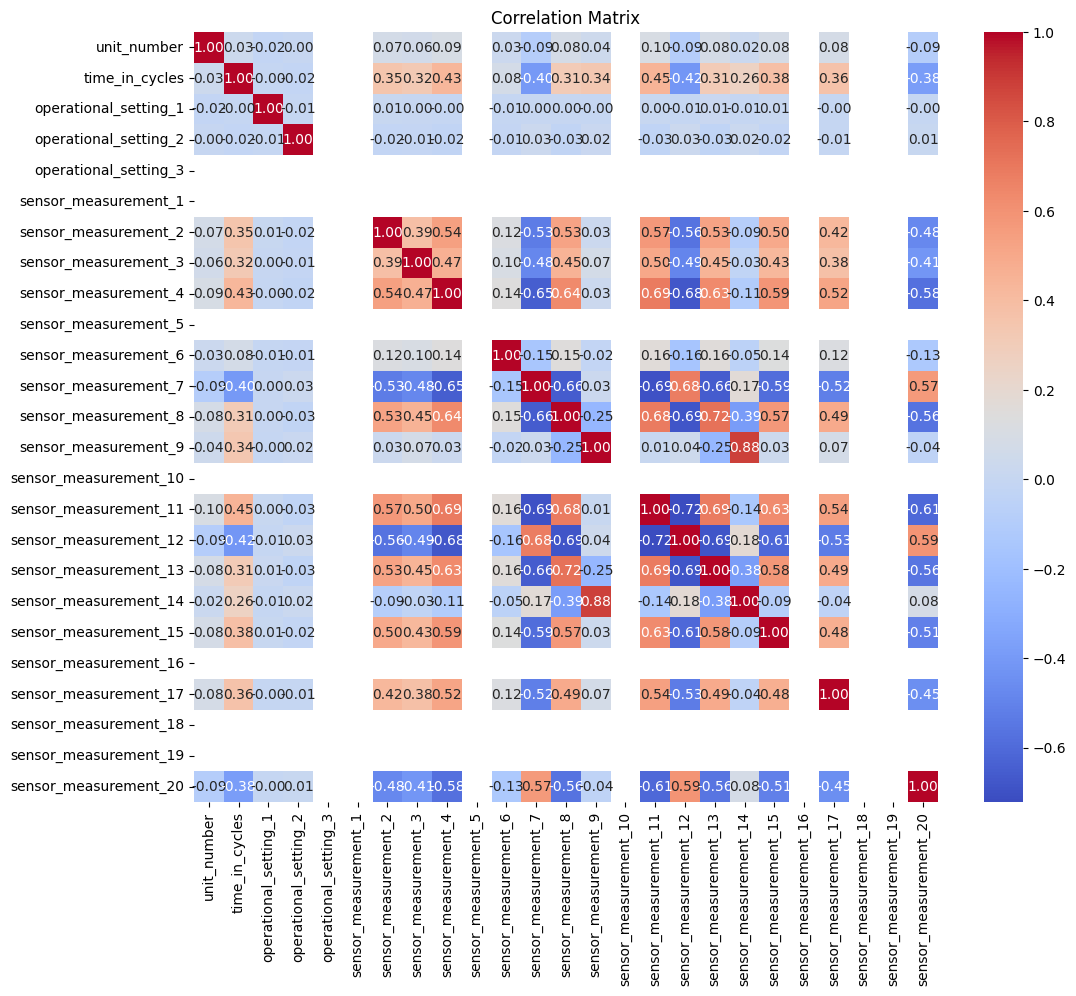

In [ ]:
# 2.Correlation Analysis
correlation_matrix = testing_data.corr()
# Plot the heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

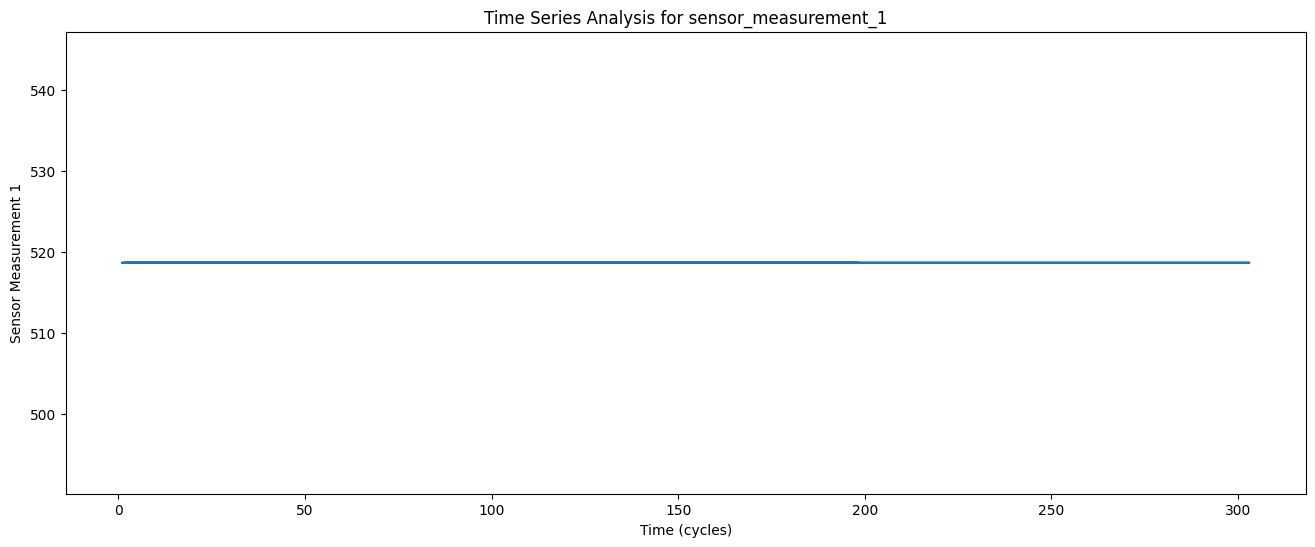

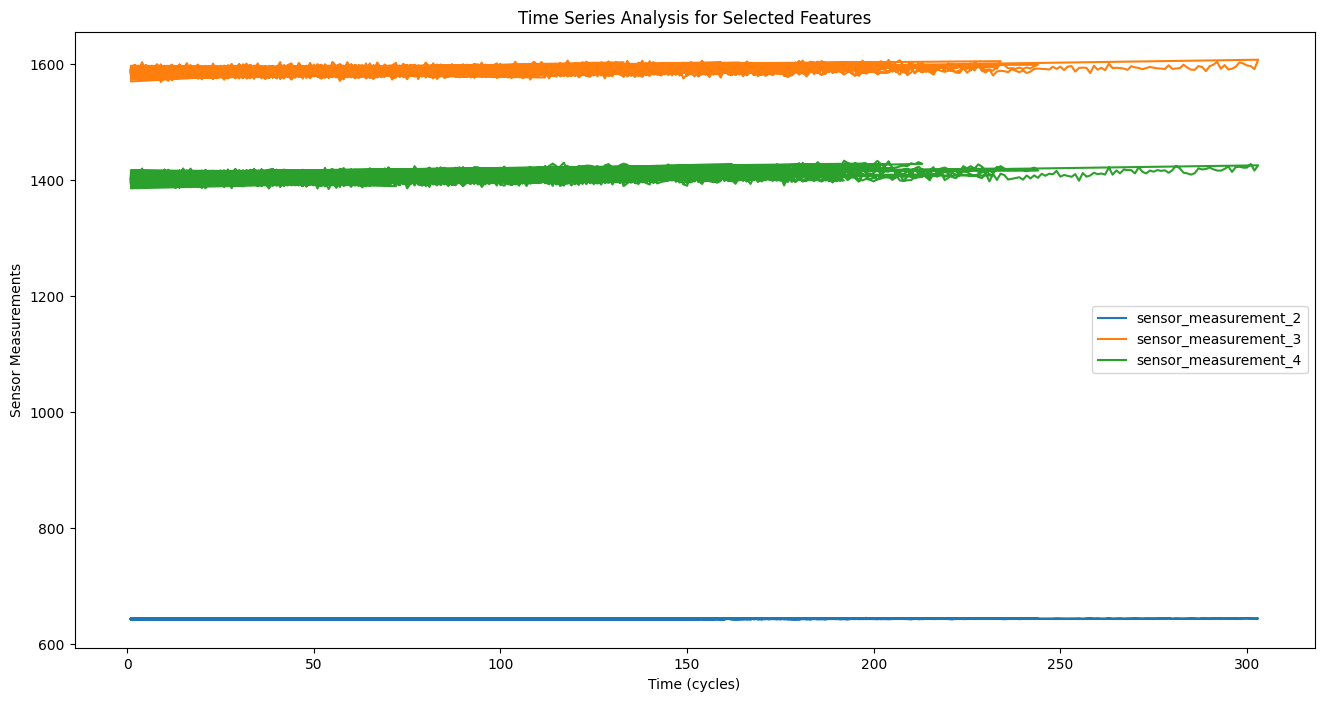

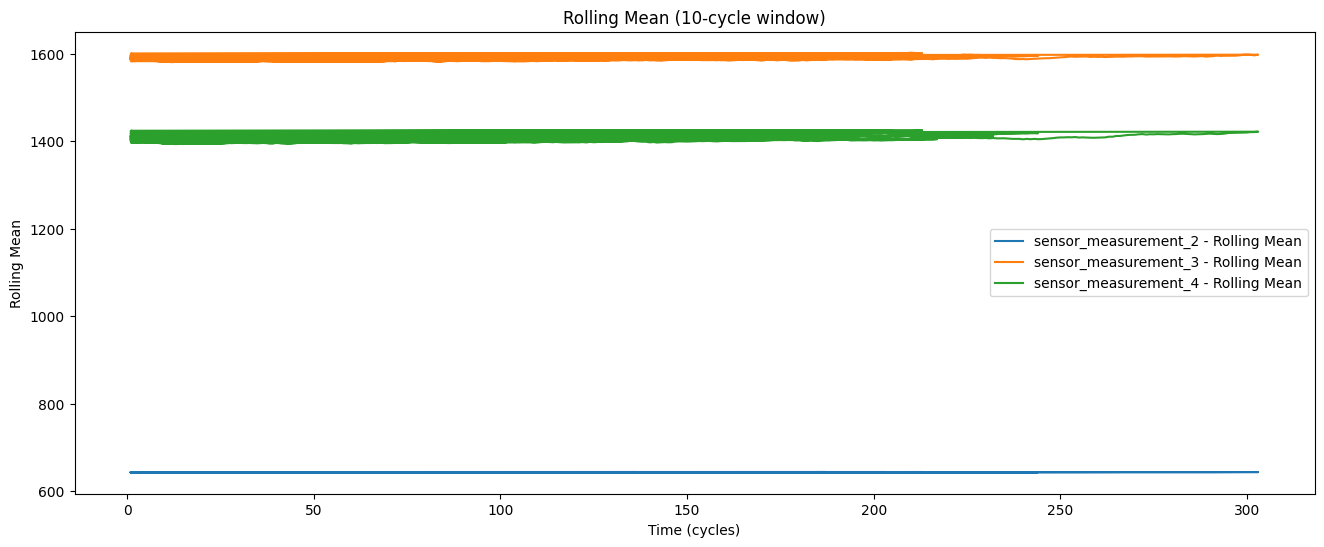

In [ ]:
#3.Time series analysis
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in the 'training_data' DataFrame
time_series_data = testing_data.set_index('time_in_cycles')

# Plot time series for a specific feature (e.g., 'sensor_measurement_1')
plt.figure(figsize=(16, 6))
plt.plot(time_series_data['sensor_measurement_1'])
plt.title('Time Series Analysis for sensor_measurement_1')
plt.xlabel('Time (cycles)')
plt.ylabel('Sensor Measurement 1')
plt.show()

# Alternatively, you can plot time series for multiple features
selected_features = ['sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4']

plt.figure(figsize=(16, 8))
for feature in selected_features:
    plt.plot(time_series_data[feature], label=feature)

plt.title('Time Series Analysis for Selected Features')
plt.xlabel('Time (cycles)')
plt.ylabel('Sensor Measurements')
plt.legend()
plt.show()

# Explore trends and patterns in the time series
# You can use additional time series analysis techniques such as rolling statistics, decomposition, etc.
# For example, plotting rolling mean and standard deviation
window_size = 10

plt.figure(figsize=(16, 6))
for feature in selected_features:
    rolling_mean = time_series_data[feature].rolling(window=window_size).mean()
    plt.plot(rolling_mean, label=f'{feature} - Rolling Mean')

plt.title(f'Rolling Mean ({window_size}-cycle window)')
plt.xlabel('Time (cycles)')
plt.ylabel('Rolling Mean')
plt.legend()
plt.show()

# Repeat similar steps for rolling standard deviation if needed


In [ ]:
correlations = testing_data.corr(method='pearson')
correlations

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20
unit_number,1.000000,0.033441,-0.018316,0.003108,NaN,NaN,0.074628,0.062551,0.094598,NaN,...,0.103550,-0.093597,0.081031,0.024554,0.084394,NaN,0.082337,NaN,NaN,-0.090696
time_in_cycles,0.033441,1.000000,-0.003070,-0.020436,NaN,NaN,0.348294,0.322089,0.428639,NaN,...,0.446006,-0.416999,0.310433,0.257877,0.384996,NaN,0.361156,NaN,NaN,-0.384389
operational_setting_1,-0.018316,-0.003070,1.000000,-0.007782,NaN,NaN,0.007051,0.000567,-0.002328,NaN,...,0.004742,-0.006220,0.011707,-0.008478,0.006398,NaN,-0.002411,NaN,NaN,-0.003096
operational_setting_2,0.003108,-0.020436,-0.007782,1.000000,NaN,NaN,-0.019430,-0.014630,-0.023169,NaN,...,-0.031462,0.025512,-0.034227,0.023805,-0.019826,NaN,-0.007550,NaN,NaN,0.007057
operational_setting_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_measurement_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_measurement_2,0.074628,0.348294,0.007051,-0.019430,NaN,NaN,1.000000,0.387745,0.540972,NaN,...,0.570332,-0.560280,0.527897,-0.086087,0.496604,NaN,0.423559,NaN,NaN,-0.475055
sensor_measurement_3,0.062551,0.322089,0.000567,-0.014630,NaN,NaN,0.387745,1.000000,0.467398,NaN,...,0.503709,-0.489617,0.447209,-0.029396,0.427978,NaN,0.379121,NaN,NaN,-0.413881
sensor_measurement_4,0.094598,0.428639,-0.002328,-0.023169,NaN,NaN,0.540972,0.467398,1.000000,NaN,...,0.687722,-0.675137,0.631025,-0.106065,0.589156,NaN,0.517853,NaN,NaN,-0.577228
sensor_measurement_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
testing_data = testing_data.drop(columns=["operational_setting_3","sensor_measurement_1","sensor_measurement_5","sensor_measurement_10","sensor_measurement_16","sensor_measurement_19","sensor_measurement_18"])
testing_data

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20
0,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02
1,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08
2,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00
3,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99
4,1,6,0.0012,0.0003,642.11,1579.12,1395.13,21.61,554.22,2388.00,9050.96,47.26,521.92,2388.08,8127.46,8.4238,392,38.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13090,100,194,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65
13091,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57
13092,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62
13093,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66


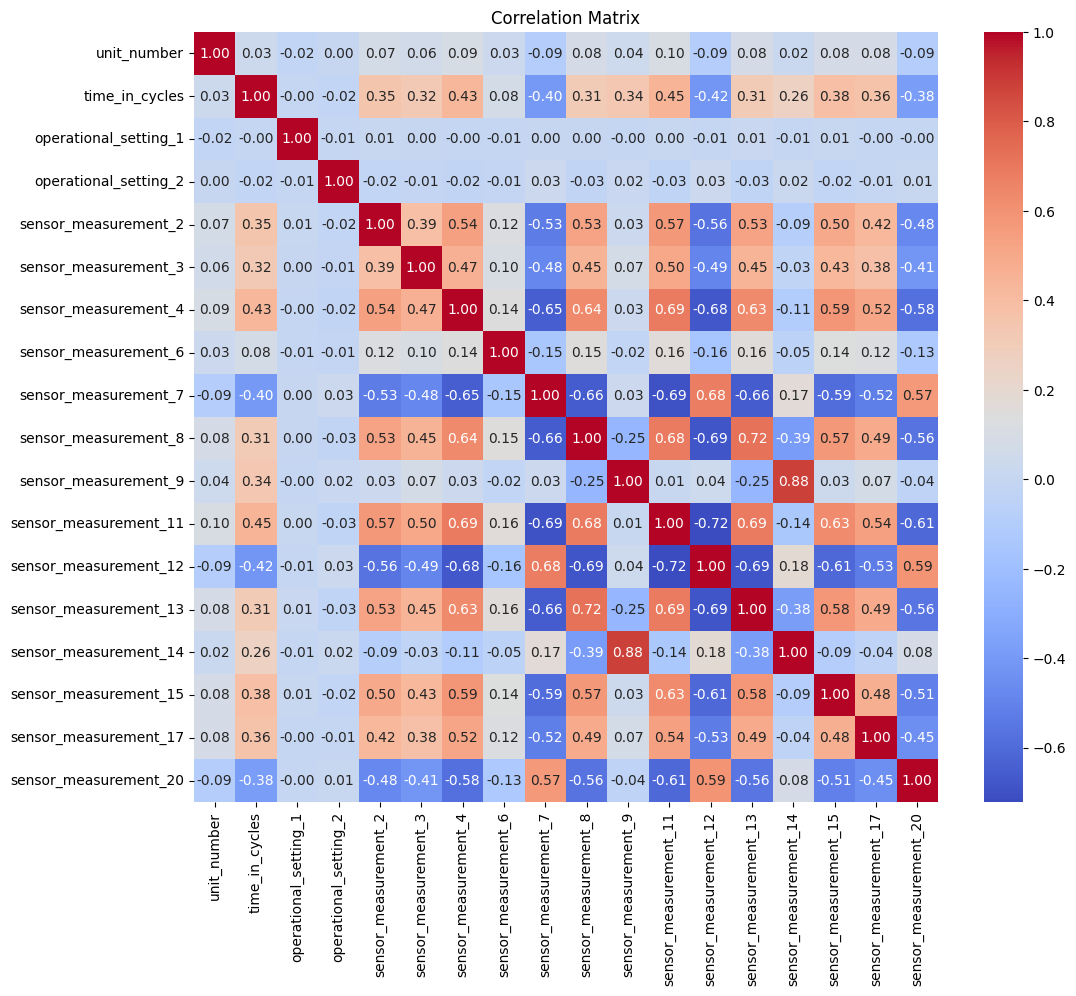

In [ ]:
# 2.Correlation Analysis
correlation_matrix = testing_data.corr()
# Plot the heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Machine learning model


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Extract features and targets from training data
X_train = training_data[[ 'sensor_measurement_2', 'sensor_measurement_3',
       'sensor_measurement_4',  'sensor_measurement_6',
       'sensor_measurement_7', 'sensor_measurement_8',
       'sensor_measurement_9','sensor_measurement_11',
       'sensor_measurement_12', 'sensor_measurement_13',
       'sensor_measurement_14', 'sensor_measurement_15',
       'sensor_measurement_17','sensor_measurement_20']]
y_train = training_data[['time_in_cycles','operational_setting_2', 'operational_setting_1']]

In [ ]:
# Extract features from testing data
X_test = testing_data[['sensor_measurement_2', 'sensor_measurement_3',
       'sensor_measurement_4',  'sensor_measurement_6',
       'sensor_measurement_7', 'sensor_measurement_8',
       'sensor_measurement_9','sensor_measurement_11',
       'sensor_measurement_12', 'sensor_measurement_13',
       'sensor_measurement_14', 'sensor_measurement_15',
       'sensor_measurement_17','sensor_measurement_20']]

In [ ]:
# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

rf_model = MultiOutputRegressor(RandomForestRegressor())
rf_model.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor())

In [ ]:
from sklearn.metrics import mean_squared_error

# Assuming rf_model is your trained random forest model
rf_pred_val = rf_model.predict(X_val)

# Assuming y_val is your actual labels
rf_mse_val = mean_squared_error(y_val, rf_pred_val)
print("RF Mean Squared Error on validation data:", rf_mse_val)


RF Mean Squared Error on validation data: 626.712843189115


In [ ]:
from sklearn.metrics import r2_score

# Assuming y_val is your actual labels and rf_pred_val is the predicted labels from your RF model
rf_r2_val = r2_score(y_val, rf_pred_val)
print("RF R-squared on validation data:", rf_r2_val)


RF R-squared on validation data: 0.1839139279540607


In [ ]:
from sklearn.neural_network import MLPRegressor

# Assuming y_train is your multioutput target variable
ann_model = MLPRegressor()
ann_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Assuming y_train is your multioutput target variable
ann_model = MLPRegressor()
ann_model.fit(X_train, y_train)

# Assuming X_val is your validation data
ann_pred_val = ann_model.predict(X_val)

# Assuming y_val is your actual labels
ann_mse_val = mean_squared_error(y_val, ann_pred_val)
print("ANN Mean Squared Error on validation data:", ann_mse_val)


ANN Mean Squared Error on validation data: 613.6478463244911


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import r2_score

# Assuming y_val is your actual labels and ann_pred_val is the predicted labels from your ANN model
ann_r2_val = r2_score(y_val, ann_pred_val)
print("ANN R-squared on validation data:", ann_r2_val)


ANN R-squared on validation data: 0.19677976132966815


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Assuming y_train is your multioutput target variable
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)


KNeighborsRegressor()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Assuming knn_model is your trained KNN model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

# Assuming X_val is your validation data
knn_pred_val = knn_model.predict(X_val)

# Assuming y_val is your actual labels
knn_mse_val = mean_squared_error(y_val, knn_pred_val)
print("KNN Mean Squared Error on validation data:", knn_mse_val)


KNN Mean Squared Error on validation data: 745.3197210282716


In [ ]:
from sklearn.metrics import r2_score

# Assuming y_val is your actual labels and knn_pred_val is the predicted labels from your KNN model
knn_r2_val = r2_score(y_val, knn_pred_val)
print("KNN R-squared on validation data:", knn_r2_val)


KNN R-squared on validation data: 0.046699619563139505


In [ ]:
# Hyperparameter tuning for RF model
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV

# Assuming y_train is your multioutput target variable
rf_model = RandomForestRegressor()
multioutput_rf_model = MultiOutputRegressor(rf_model)

# Define the parameter grid for RandomForestRegressor
rf_params = {'estimator__n_estimators': [10, 50, 100], 'estimator__max_depth': [2, 5, 10]}

# Create GridSearchCV for the MultiOutputRegressor
rf_grid = GridSearchCV(multioutput_rf_model, rf_params, cv=5)
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=MultiOutputRegressor(estimator=RandomForestRegressor()),
             param_grid={'estimator__max_depth': [2, 5, 10],
                         'estimator__n_estimators': [10, 50, 100]})

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Assuming y_train is your target variable for regression
ann_model = MLPRegressor()
ann_params = {
    'hidden_layer_sizes': [(10, 10), (20, 20), (30, 30)],
    'activation': ['relu', 'tanh', 'logistic']
}

# Create GridSearchCV for the MLPRegressor
ann_grid = GridSearchCV(ann_model, ann_params, cv=5)
ann_grid.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'hidden_layer_sizes': [(10, 10), (20, 20), (30, 30)]})

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Assuming y_train is your target variable for regression
knn_model = KNeighborsRegressor()
knn_params = {'n_neighbors': [3, 5, 7, 9]}

# Create GridSearchCV for the KNeighborsRegressor
knn_grid = GridSearchCV(knn_model, knn_params, cv=5)
knn_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [ ]:
# Get the best model and its parameters
best_model = knn_grid.best_estimator_
print("Best model:", best_model)
print("Best parameters:", best_model.get_params())

Best model: KNeighborsRegressor(n_neighbors=9)
Best parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


In [ ]:
# Best Random Forest model
best_rf_model = rf_grid.best_estimator_.estimators_[0]  # Assuming you have only one estimator
best_rf_params = rf_grid.best_params_

# Best MLPRegressor model
best_ann_model = ann_grid.best_estimator_
best_ann_params = ann_grid.best_params_

# Best KNeighborsRegressor model
best_knn_model = knn_grid.best_estimator_
best_knn_params = knn_grid.best_params_

print("Best Random Forest Model:", best_rf_model)
print("Best Random Forest Parameters:", best_rf_params)
print("\nBest MLPRegressor Model:", best_ann_model)
print("Best MLPRegressor Parameters:", best_ann_params)
print("\nBest KNeighborsRegressor Model:", best_knn_model)
print("Best KNeighborsRegressor Parameters:", best_knn_params)


Best Random Forest Model: RandomForestRegressor(max_depth=10)
Best Random Forest Parameters: {'estimator__max_depth': 10, 'estimator__n_estimators': 100}

Best MLPRegressor Model: MLPRegressor(activation='tanh', hidden_layer_sizes=(30, 30))
Best MLPRegressor Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (30, 30)}

Best KNeighborsRegressor Model: KNeighborsRegressor(n_neighbors=9)
Best KNeighborsRegressor Parameters: {'n_neighbors': 9}
